# Regression between sea level height and the dangendorf wind proxies for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical'
model = 'Dangendorf'

begin = 1950
end = 2014
period = f'{begin}-{end}'

#### Import and plot cmip6 sea level (zos) and pressure data historical

In [2]:
zos = imprt.import_cmip6_slh_data()

In [3]:
pres_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [4]:
# Select period from 1950 - 2014
zos = zos.where(zos.time >= 1950, drop=True)
pres_data = pres_data.where(zos.time >= 1950, drop=True)


### Plot data

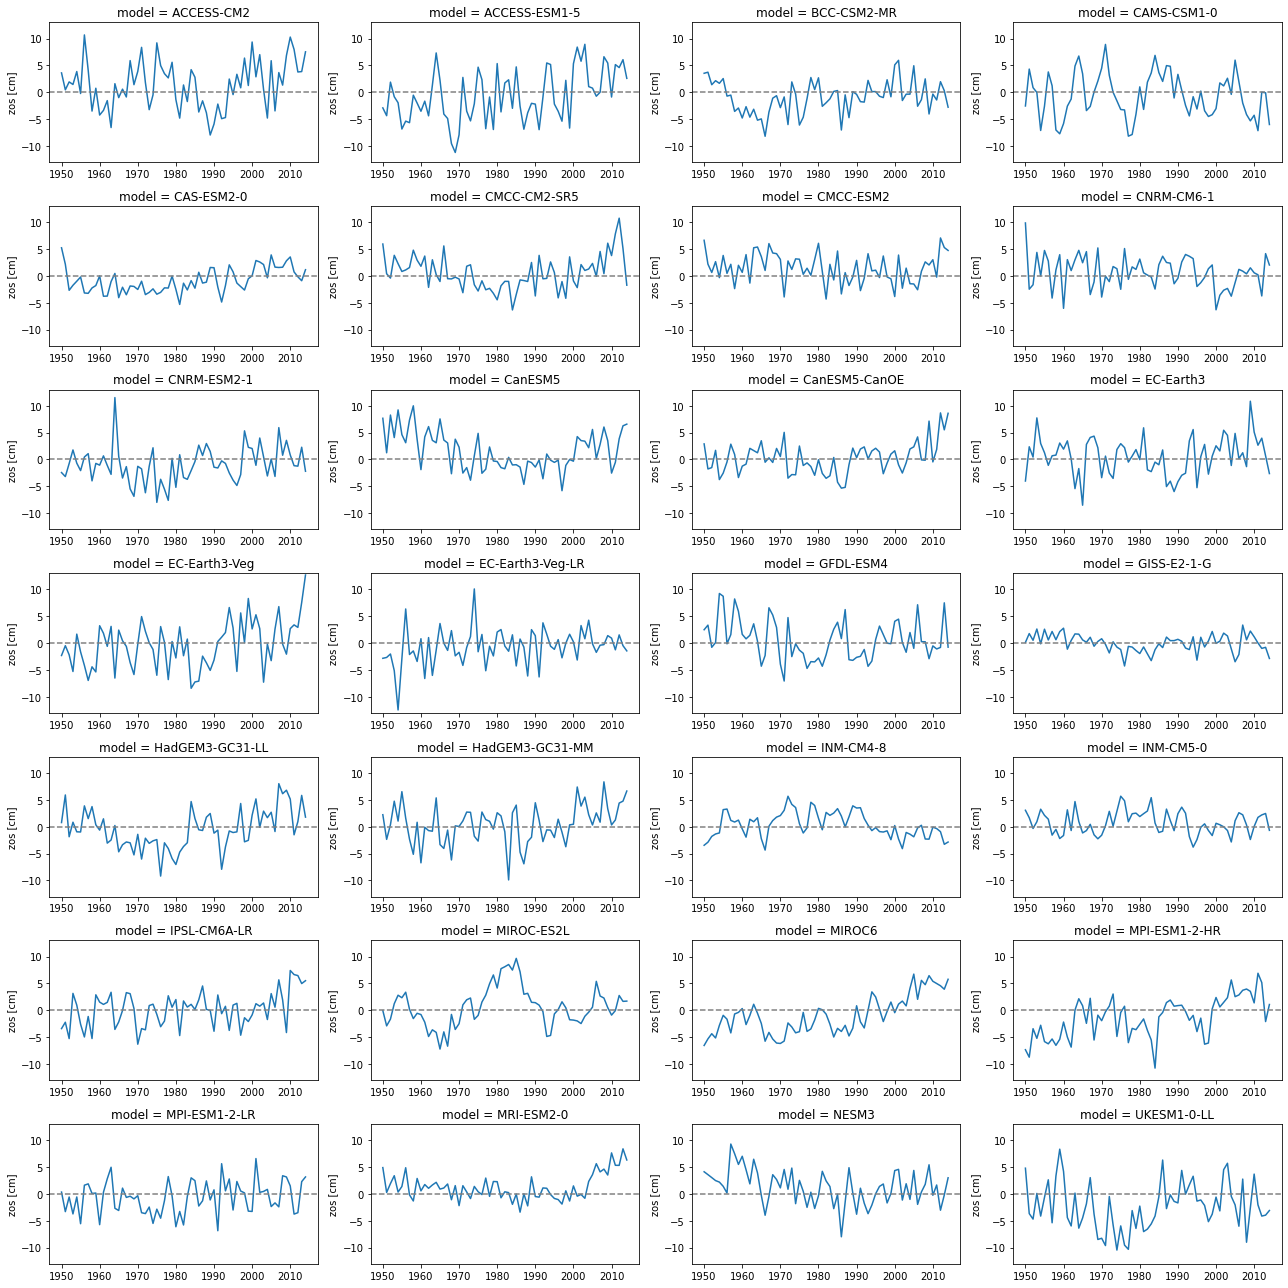

In [5]:
figs.plot_zos_data_per_model(zos, data_type, period = period)

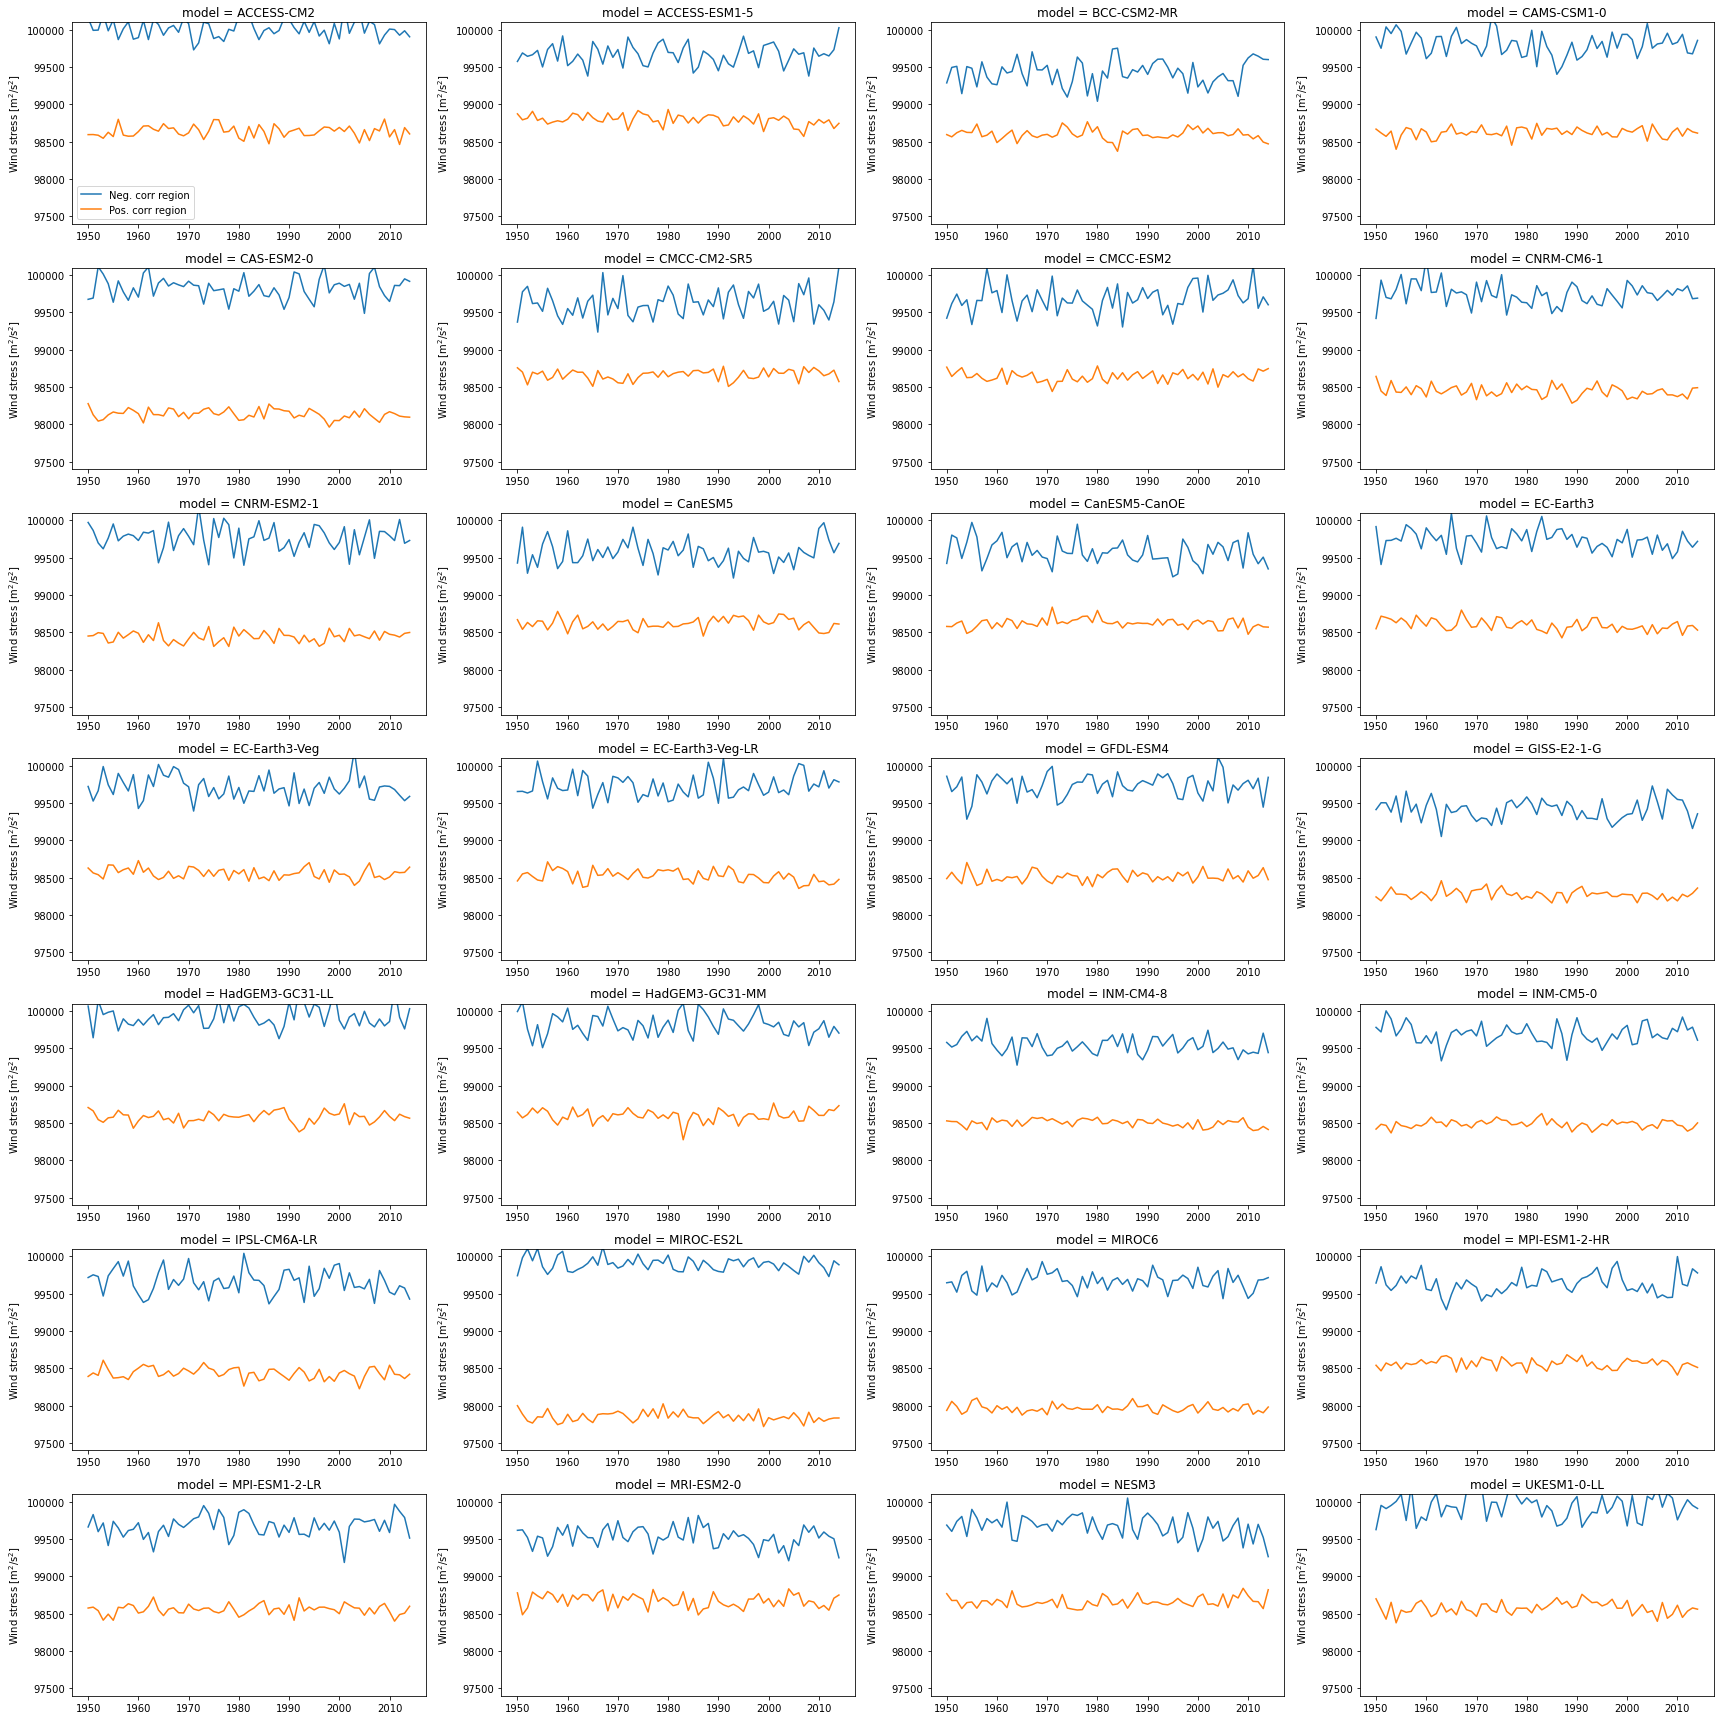

In [6]:
figs.plot_cmip6_wind_data_per_model(pres_data, model, data_type, period = period)

### Perform regression

In [7]:
results, timeseries, significance = regres.regression_cmip6(pres_data, zos, wind_model = model, data_type = data_type)

In [8]:
results

<xarray.Dataset>
Dimensions:          (model: 28, station: 7)
Coordinates:
  * station          (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model            (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    r2               (model, station) float64 0.1392 0.1392 ... 0.6508 0.6935
    r2_wind          (model, station) float64 0.1391 0.1391 ... 0.5713 0.5744
    r2_neg           (model, station) float64 0.1317 0.1317 ... 0.5647 0.5726
    r2_pos           (model, station) float64 0.0777 0.0777 ... 0.2659 0.2746
    rmse             (model, station) float64 3.407 3.407 3.443 ... 3.127 2.622
    constant         (model, station) float64 1.38 1.38 1.458 ... -5.729 -5.789
    neg_corr_region  (model, station) float64 -1.11 -1.11 -1.348 ... -2.53 -2.12
    pos_corr_region  (model, station) float64 0.393 0.393 1.033 ... 1.401 1.394
    trend            (model, station) float64 0.07395 0.07395 ... -3.236 -3.53

In [9]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

,Negative corr region,Positive corr region,trend,total,wind total
model,,,,,
ACCESS-CM2,True,True,False,True,True
ACCESS-ESM1-5,True,True,False,True,True
BCC-CSM2-MR,False,True,False,True,True
CAMS-CSM1-0,False,True,False,True,True
CAS-ESM2-0,True,False,True,True,True
CMCC-CM2-SR5,True,True,True,True,True
CMCC-ESM2,True,True,False,True,True
CNRM-CM6-1,True,True,False,True,True
CNRM-ESM2-1,True,True,False,True,True


#### Plot regression results

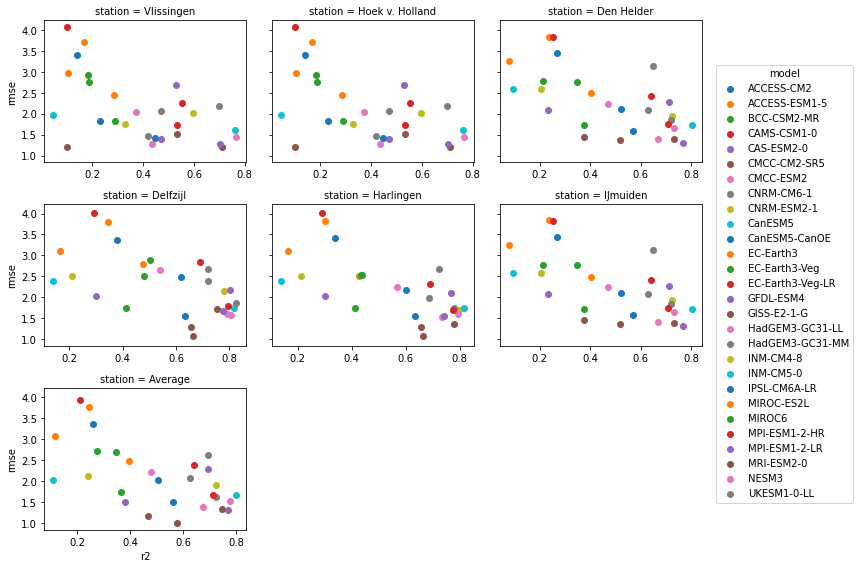

In [10]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type, period = period)

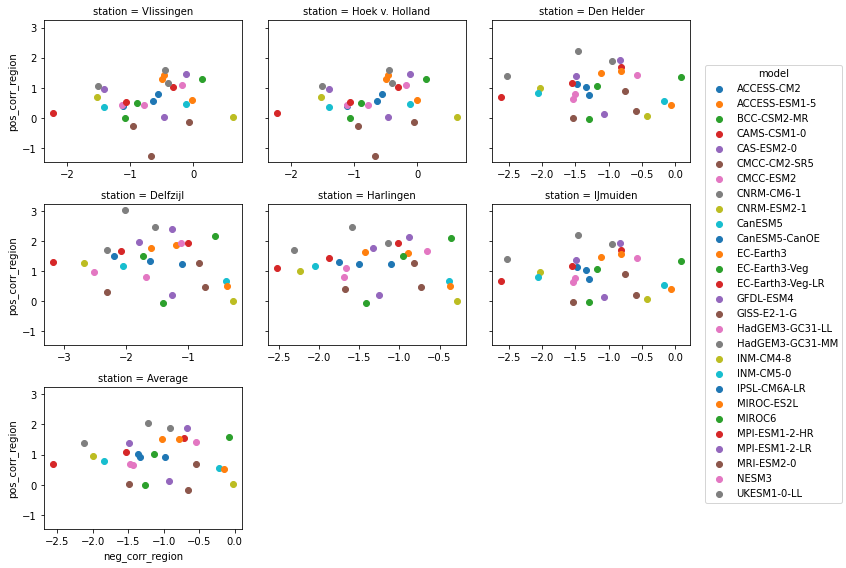

In [11]:
figs.plot_cmip6_two_variables(results, 'neg_corr_region', 'pos_corr_region', data_type, period = period)

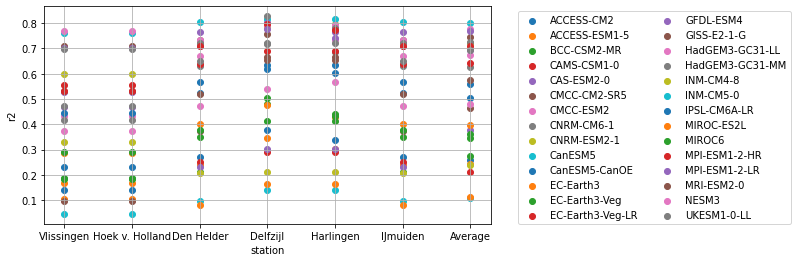

In [12]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type, period = period)

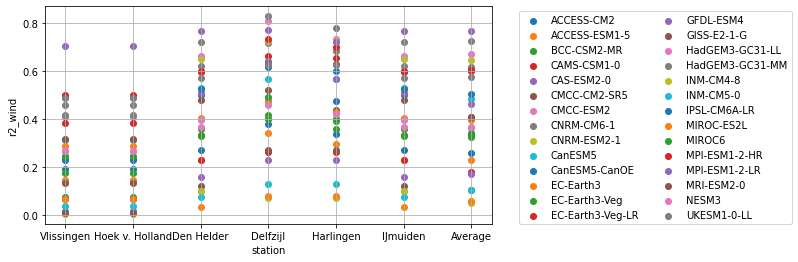

In [13]:
figs.plot_cmip6_result_per_station(results, 'r2_wind', data_type, period = period)

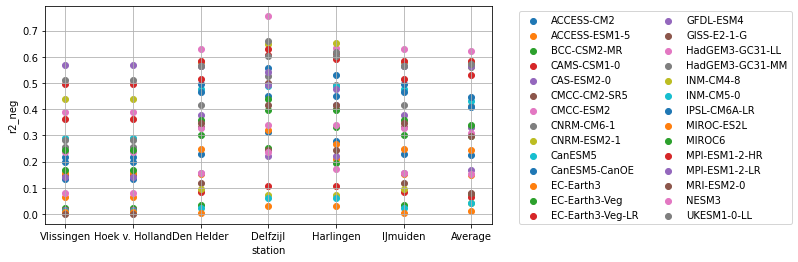

In [14]:
figs.plot_cmip6_result_per_station(results, 'r2_neg', data_type, period = period)

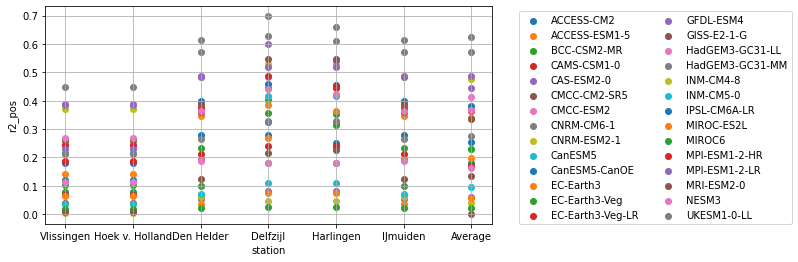

In [15]:
figs.plot_cmip6_result_per_station(results, 'r2_pos', data_type, period = period)

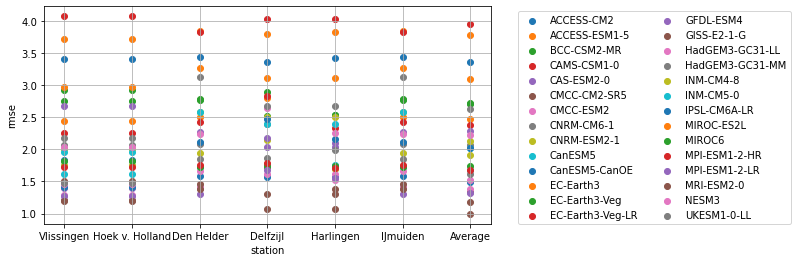

In [16]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type, period = period)

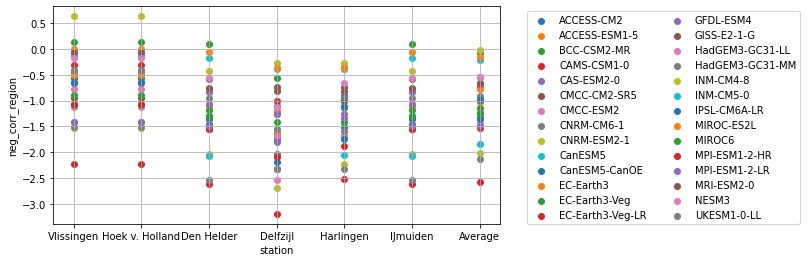

In [17]:
figs.plot_cmip6_result_per_station(results, 'neg_corr_region', data_type, period = period)

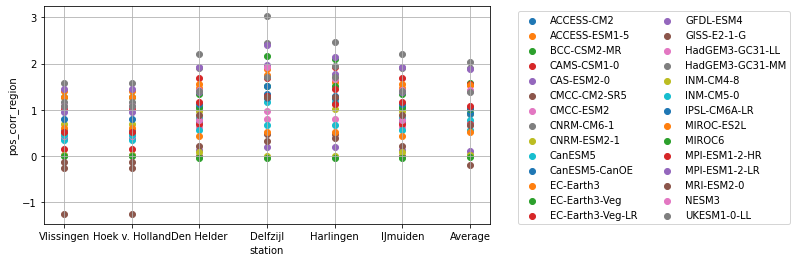

In [18]:
figs.plot_cmip6_result_per_station(results, 'pos_corr_region', data_type, period = period)

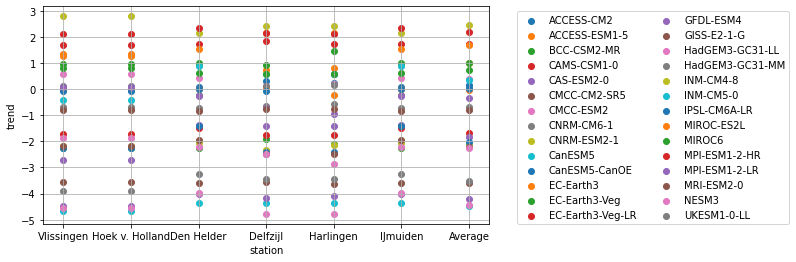

In [19]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type, period = period)

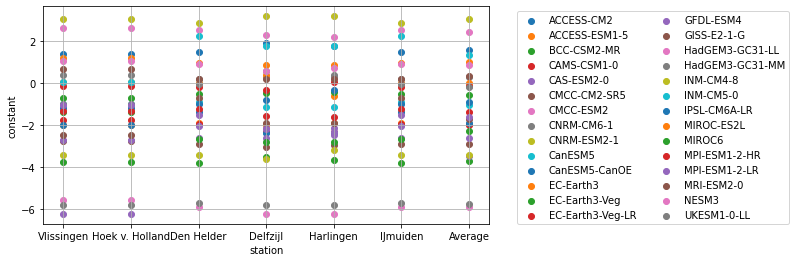

In [20]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type, period = period)

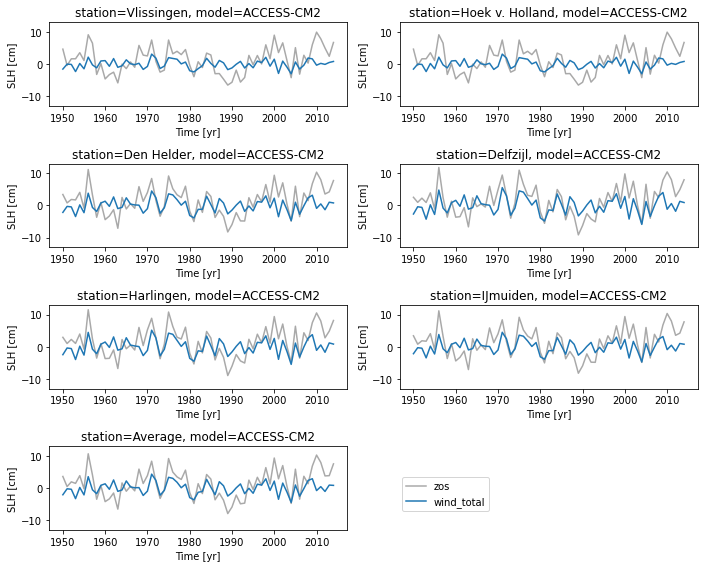

In [21]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['wind_total'], period = period)

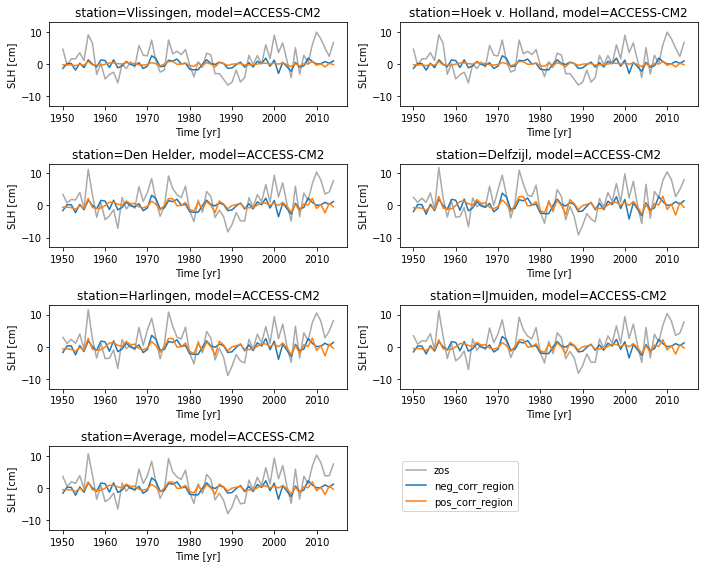

In [22]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], 
                                                 var = ['neg_corr_region', 'pos_corr_region'], period = period)

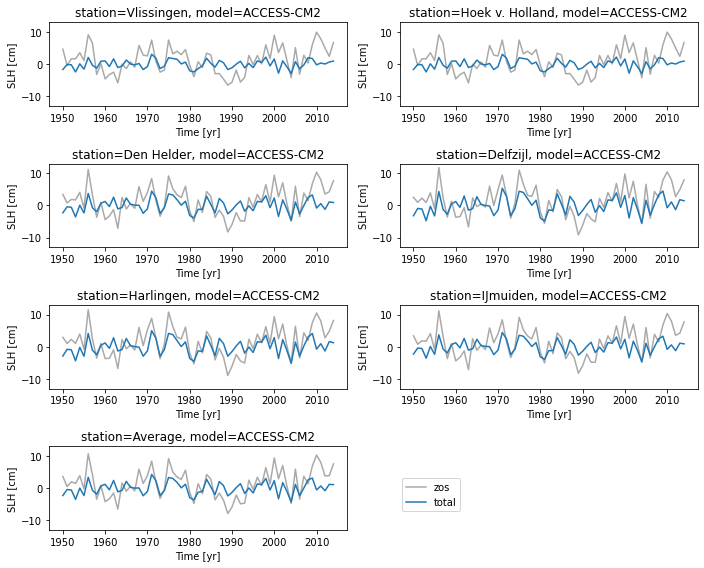

In [23]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['total'], period = period)

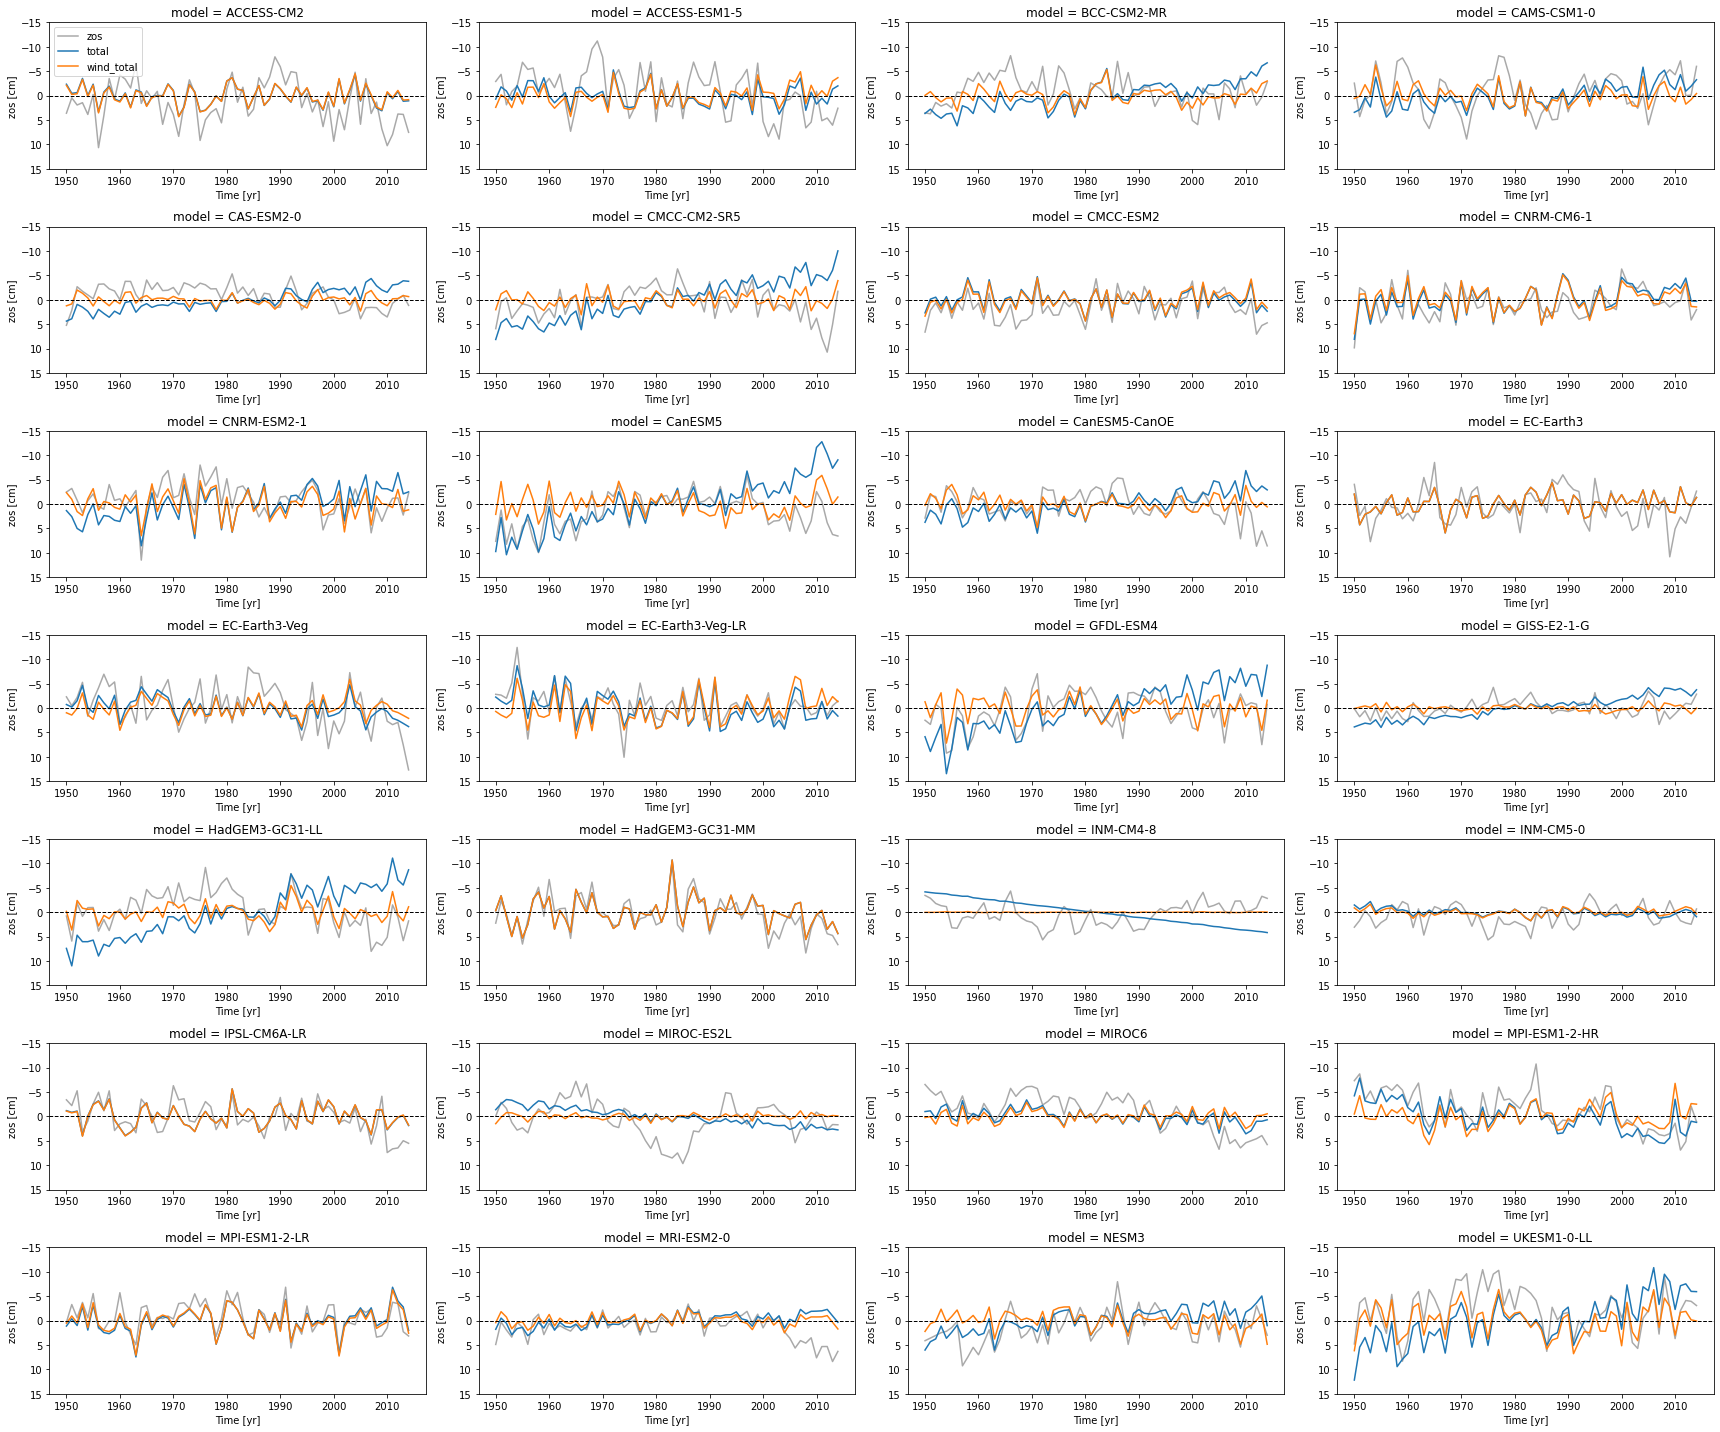

In [24]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model, period = period)

#### Plot trends

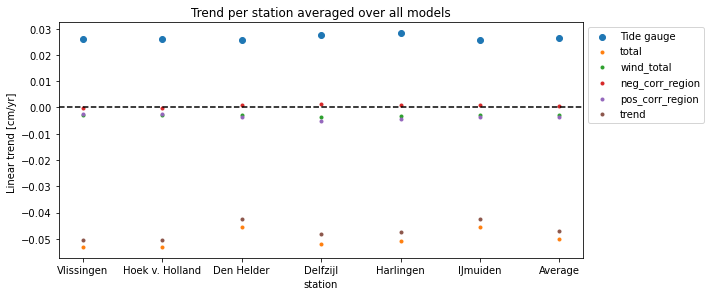

In [25]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'neg_corr_region', 'pos_corr_region', 'trend'], 
                                                             model, data_type, errorbar = False, period = period)

### Obtain trends

In [26]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df = pd.DataFrame({'variable': ['trend', 'se']})
df = df.set_index('variable')

for model in timeseries.model.values:
    trend = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).slope*10
    se = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).stderr*10
    df[model] = [trend, se]

    
dfT = df.T

df['Average'] = [dfT.mean()['trend'], dfT.mean()['se']]

df.T

variable,trend,se
ACCESS-CM2,0.021127,0.130795
ACCESS-ESM1-5,-0.330669,0.136717
BCC-CSM2-MR,-0.056332,0.109873
CAMS-CSM1-0,0.148249,0.132608
CAS-ESM2-0,-0.006404,0.066576
CMCC-CM2-SR5,-0.087827,0.100933
CMCC-ESM2,-0.124821,0.128351
CNRM-CM6-1,-0.199777,0.168778
CNRM-ESM2-1,0.121329,0.179530
CanESM5,-0.014784,0.160399


In [27]:
best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 
                'MPI-ESM1-2-HR', 'NESM3']

In [28]:
df = pd.DataFrame({'variable': ['trend', 'se']})
df = df.set_index('variable')

for model in timeseries.where(timeseries.model.isin(best_models), drop = True).model.values:
    trend = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).slope*10
    se = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).stderr*10
    df[model] = [trend, se]

    
dfT = df.T

df['Average'] = [dfT.mean()['trend'], dfT.mean()['se']]

df.T

variable,trend,se
ACCESS-CM2,0.021127,0.130795
ACCESS-ESM1-5,-0.330669,0.136717
BCC-CSM2-MR,-0.056332,0.109873
CAMS-CSM1-0,0.148249,0.132608
CMCC-CM2-SR5,-0.087827,0.100933
CMCC-ESM2,-0.124821,0.128351
CNRM-CM6-1,-0.199777,0.168778
CanESM5,-0.014784,0.160399
CanESM5-CanOE,0.104299,0.109286
EC-Earth3-Veg-LR,-0.291198,0.195643


In [29]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df_trends = pd.DataFrame({'model': timeseries.model.values, 'trend':'', 'se':''})
df_trends = df_trends.set_index('model')

for model in timeseries.model.values:
    df_trends['trend'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).slope*10
    df_trends['se'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).stderr*10

df_trends

,trend,se
model,,
ACCESS-CM2,0.021127,0.130795
ACCESS-ESM1-5,-0.330669,0.136717
BCC-CSM2-MR,-0.056332,0.109873
CAMS-CSM1-0,0.148249,0.132608
CAS-ESM2-0,-0.006404,0.066576
CMCC-CM2-SR5,-0.087827,0.100933
CMCC-ESM2,-0.124821,0.128351
CNRM-CM6-1,-0.199777,0.168778
CNRM-ESM2-1,0.121329,0.17953


In [30]:
df_trends.max()

trend    0.256864
se       0.213009
dtype: object

In [33]:
df_trends.min()

trend   -0.330669
se       0.003201
dtype: object

In [32]:
df_trends.mean()

trend   -0.030119
se       0.122365
dtype: float64

In [31]:
df_trends.std()

trend    0.130933
se       0.051749
dtype: float64